# **<h1 style="color:red">Hello folks, in case you like this notebook dont forget to <span style="color:purple">UPVOTE</span> it and thanks for viewing :)</h1>**

# **<h1 style="color:green;">Variable Notes :</h1>**
<p style="color:purple;">pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
</p>
<p style="color:purple;">
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
</p>  
<p style="color:purple;">
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
</p>
<p style="color:purple;">
parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
</p>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


# **<h1 style="color:skyblue;">Importing Libraries :</h1>**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,log_loss,accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

np.random.seed(0)
sns.set_palette('pastel')

# **<h1 style="color:skyblue;">Loading the dataset :</h1>**

In [3]:
train = pd.read_csv(r'/kaggle/input/titanic/train.csv')
test = pd.read_csv(r'/kaggle/input/titanic/test.csv')
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# **<h1 style="color:skyblue;">Null Values :</h1>**

In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**<p style="color:purple;">The age feature consists of many missing values.</p>**

**<p style="color:purple;">To handle the missing values in the age column of the dataset I have calculated the average age of the males and the females in the dataset and replaced the missing values accoring to their sex.</p>**

In [14]:
avg_age_train = (train.groupby("Sex")['Age']).mean()
print(avg_age_train)
avg_age_test = (test.groupby("Sex")['Age']).mean()
print(avg_age_test)

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64
Sex
female    30.272362
male      30.272732
Name: Age, dtype: float64


In [15]:
for i in range(len(train['Age'])):
    if train['Age'].isnull()[i] == True and train['Sex'][i] == 'male':
        train['Age'][i] = np.round(avg_age_train['male'],decimals=1)
    elif train['Age'].isnull()[i] == True and train['Sex'][i] == 'female':
        train['Age'][i] = np.round(avg_age_train['female'],decimals=1)
        
for i in range(len(test['Age'])):
    if test['Age'].isnull()[i] == True and test['Sex'][i] == 'male':
        test['Age'][i] = np.round(avg_age_test['male'],decimals=1)
    elif test['Age'].isnull()[i] == True and test['Sex'][i] == 'female':
        test['Age'][i] = np.round(avg_age_test['female'],decimals=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__'

**<p style="color:purple;">Therefore the missing age values are handled.</p>**

In [16]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [17]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [18]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**<p style="color:purple;">I will handle the remaining missing values in the Cabin column after some feature engineering.</p>**

**<p style="color:green;">Combining the dataset :</p>**

In [20]:
Y = train['Survived']
train = train.drop('Survived',axis=1)
data = pd.concat([train,test],axis=0)
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**<p style="color:purple;">I am going to replace the missing value in the Fare column by the average fare of according to the Sex</p>**

In [21]:
avg_fare = data.groupby("Sex")['Fare'].mean()
avg_fare

Sex
female    46.198097
male      26.154601
Name: Fare, dtype: float64

In [22]:
print("Index of the null value is: ",test[test['Fare'].isnull()].index.tolist())
print(test['Sex'][152])

Index of the null value is:  [152]
male


In [23]:
data['Fare'][152] = avg_fare['male']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**<p style="color:purple;">Hence the missing value in the Fare column in the data is handled</p>**

In [24]:
data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

**<p style="color:purple;">The missing values in the cabin column will be handled after some feature engineering.</p>**

# **<h1 style="color:skyblue;">Duplicate Values :**

In [25]:
print("Number of duplicate rows in the train dataset :",train.duplicated().sum())
print("Number of duplicate rows in the test dataset :",test.duplicated().sum())

Number of duplicate rows in the train dataset : 0
Number of duplicate rows in the test dataset : 0


**<p style="color:purple">There are no duplicate rows present in the dataset .**

# **<h1 style="color:skyblue;">Feature Engineering :**

1. **<p style="color:green;">Creating a feature with the titles of the name.</p>**

In [26]:
Name_title_data = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(Name_title_data)
data['Name_title'] = Name_title_data
data = data.reset_index(drop=True)
data.head()

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Name, Length: 1309, dtype: object


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


2. **<p style="color:green;">Creating the category of the age section.**

In [27]:
age_group_data = [None] * len(data['Age'])
for i in range(len(data['Age'])):
    if data['Age'][i] <= 3:
        age_group_data[i] = 'Baby'
    elif data['Age'][i] >3 and data['Age'][i] <= 13:
        age_group_data[i] = 'Child'
    elif data['Age'][i] >13 and data['Age'][i] <= 19:
        age_group_data[i] = 'Teenager'
    elif data['Age'][i] >19 and data['Age'][i] <= 30:
        age_group_data[i] = 'Young Adult'
    elif data['Age'][i] >30 and data['Age'][i] <= 45:
        age_group_data[i] = 'Middle Aged Adult'
    elif data['Age'][i] >45 and data['Age'][i] <65:
        age_group_data[i] = 'Adult'
    else:
        age_group_data[i] = 'Old'

data['age_group'] = age_group_data

In [28]:
np.unique(data['Name_title'])

array(['Capt', 'Col', 'Countess', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady',
       'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev',
       'Sir'], dtype=object)

3. **<p style="color:green;">Creating features that the person is married or not,and the family size with SibSp and parch column**

In [29]:
data['Is_Married'] = 0
data['Is_Married'].loc[data['Name_title'] == 'Mrs'] = 1
data['FamSize'] = data['SibSp'] + data['Parch'] + 1
data['Single'] = data['FamSize'].map(lambda s: 1 if s == 1 else 0)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title,age_group,Is_Married,FamSize,Single
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Young Adult,0,2,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Middle Aged Adult,1,2,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Young Adult,0,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Middle Aged Adult,1,2,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Middle Aged Adult,0,1,1


4. **<p style="color:green;">Creating a feature which tells us that the person is travelling with someone or not according to the similar number on the tickets.**

In [31]:
np.unique(data['Ticket'])
tic = data.groupby('Ticket',sort=True,group_keys=True)
groups = list(tic.groups)
togther = [None] * len(data['Ticket'])
k=0
for i in range(len(groups)):
    for j in range(len(data['Ticket'])):
        if data['Ticket'][j] == groups[i]:
            togther[j] = i
data['Togther'] = togther

In [32]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title,age_group,Is_Married,FamSize,Single,Togther
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Young Adult,0,2,0,720
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Middle Aged Adult,1,2,0,816
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Young Adult,0,1,1,914
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Middle Aged Adult,1,2,0,65
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Middle Aged Adult,0,1,1,649


5. **<p style="color:green;">A feature which categorizes the fare rates of the person.**

In [33]:
np.unique(data['Fare'])

array([  0.        ,   3.1708    ,   4.0125    ,   5.        ,
         6.2375    ,   6.4375    ,   6.45      ,   6.4958    ,
         6.75      ,   6.8583    ,   6.95      ,   6.975     ,
         7.        ,   7.0458    ,   7.05      ,   7.0542    ,
         7.125     ,   7.1417    ,   7.225     ,   7.2292    ,
         7.25      ,   7.2833    ,   7.3125    ,   7.4958    ,
         7.5208    ,   7.55      ,   7.575     ,   7.5792    ,
         7.6292    ,   7.65      ,   7.7208    ,   7.725     ,
         7.7292    ,   7.7333    ,   7.7375    ,   7.7417    ,
         7.75      ,   7.775     ,   7.7792    ,   7.7875    ,
         7.7958    ,   7.8       ,   7.8208    ,   7.8292    ,
         7.85      ,   7.8542    ,   7.875     ,   7.8792    ,
         7.8875    ,   7.8958    ,   7.925     ,   8.0292    ,
         8.05      ,   8.1125    ,   8.1375    ,   8.1583    ,
         8.3       ,   8.3625    ,   8.4042    ,   8.4333    ,
         8.4583    ,   8.5167    ,   8.6542    ,   8.66

In [34]:
rates = [None]*len(data['Fare'])
for i in range(len(data['Fare'])):
    if data['Fare'][i]<=10:
        rates[i] = 1
    elif data['Fare'][i] >10 and data['Fare'][i]<=30:
        rates[i] = 2
    elif data['Fare'][i] >30 and data['Fare'][i]<=70:
        rates[i] = 3
    elif data['Fare'][i] >70 and data['Fare'][i]<=100:
        rates[i] = 4 
    else:
        rates[i] = 5
data['Rates'] = rates

6. **<p style="color:green;">A feature which tells us the the cabin value is present or not since the cabin feature has so many null values.**

In [35]:
data['Cabin_present'] = 1
data['Cabin_present'].loc[data['Cabin'].isnull()] = 0

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [36]:
data.shape

(1309, 19)

**<p style="color:purple;">Now removing the useless columns.**

In [37]:
data = data.drop('Cabin',axis=1)
data = data.drop('Ticket',axis=1)
data = data.drop('Name',axis=1)
data = data.drop('PassengerId',axis=1)

# **<h1 style="color:skyblue;">One-Hot Encoding of features :**

In [38]:
data_ohe = pd.get_dummies(data,drop_first=True)
data_ohe.head()

,Pclass,Age,SibSp,Parch,Fare,Is_Married,FamSize,Single,Togther,Rates,...,Name_title_Mrs,Name_title_Ms,Name_title_Rev,Name_title_Sir,age_group_Baby,age_group_Child,age_group_Middle Aged Adult,age_group_Old,age_group_Teenager,age_group_Young Adult
0,3,22.0,1,0,7.2500,0,2,0,720,1,...,0,0,0,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,1,2,0,816,4,...,1,0,0,0,0,0,1,0,0,0
2,3,26.0,0,0,7.9250,0,1,1,914,1,...,0,0,0,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,1,2,0,65,3,...,1,0,0,0,0,0,1,0,0,0
4,3,35.0,0,0,8.0500,0,1,1,649,1,...,0,0,0,0,0,0,1,0,0,0


# **<h1 style="color:skyblue;">Data Visualisation :**

**<p style="color:green;">Hetamaps :**

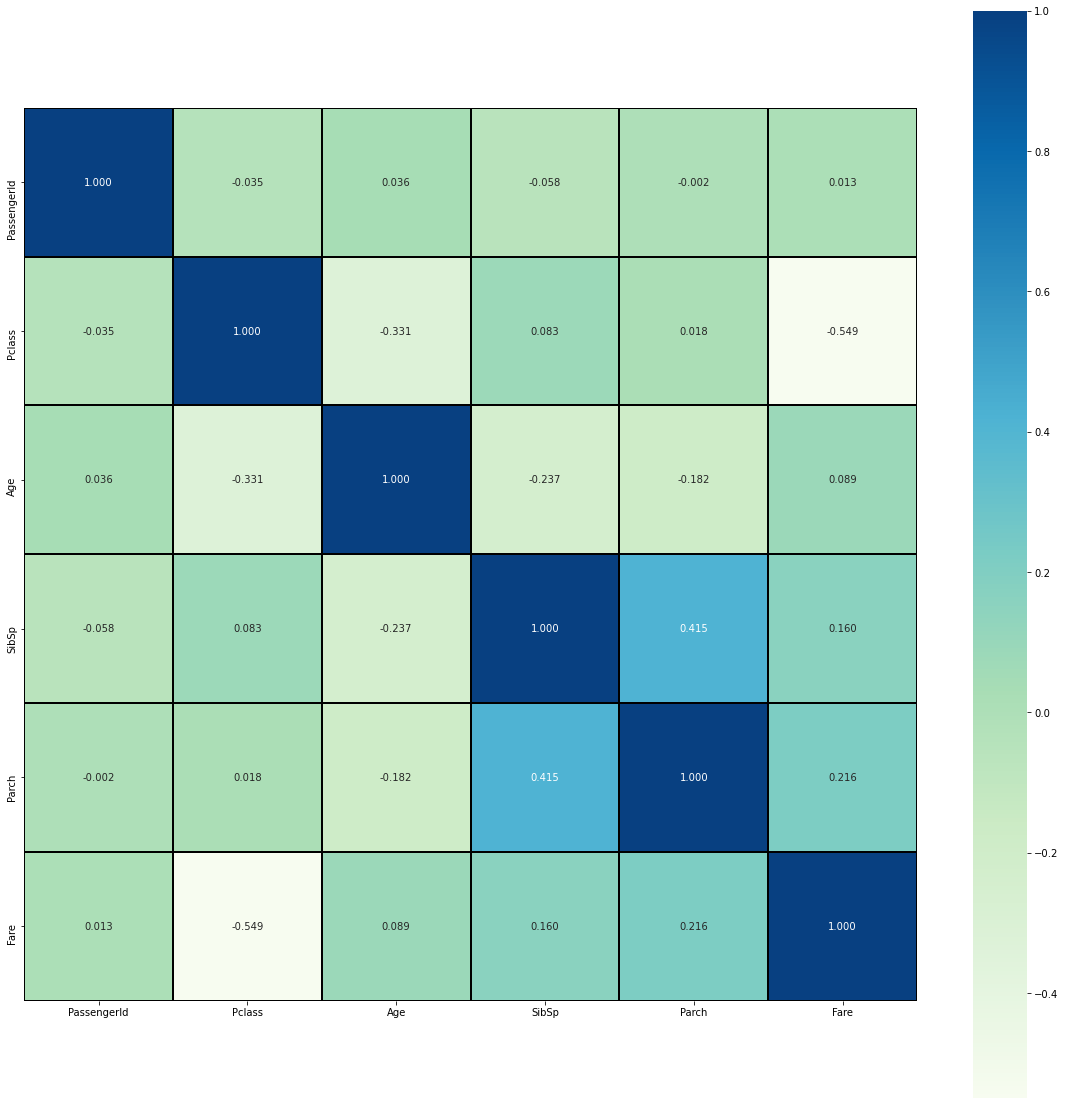

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(),annot=True,fmt="0.3f",cmap='GnBu',linewidth=1.2,linecolor='black',square=True)
plt.show()

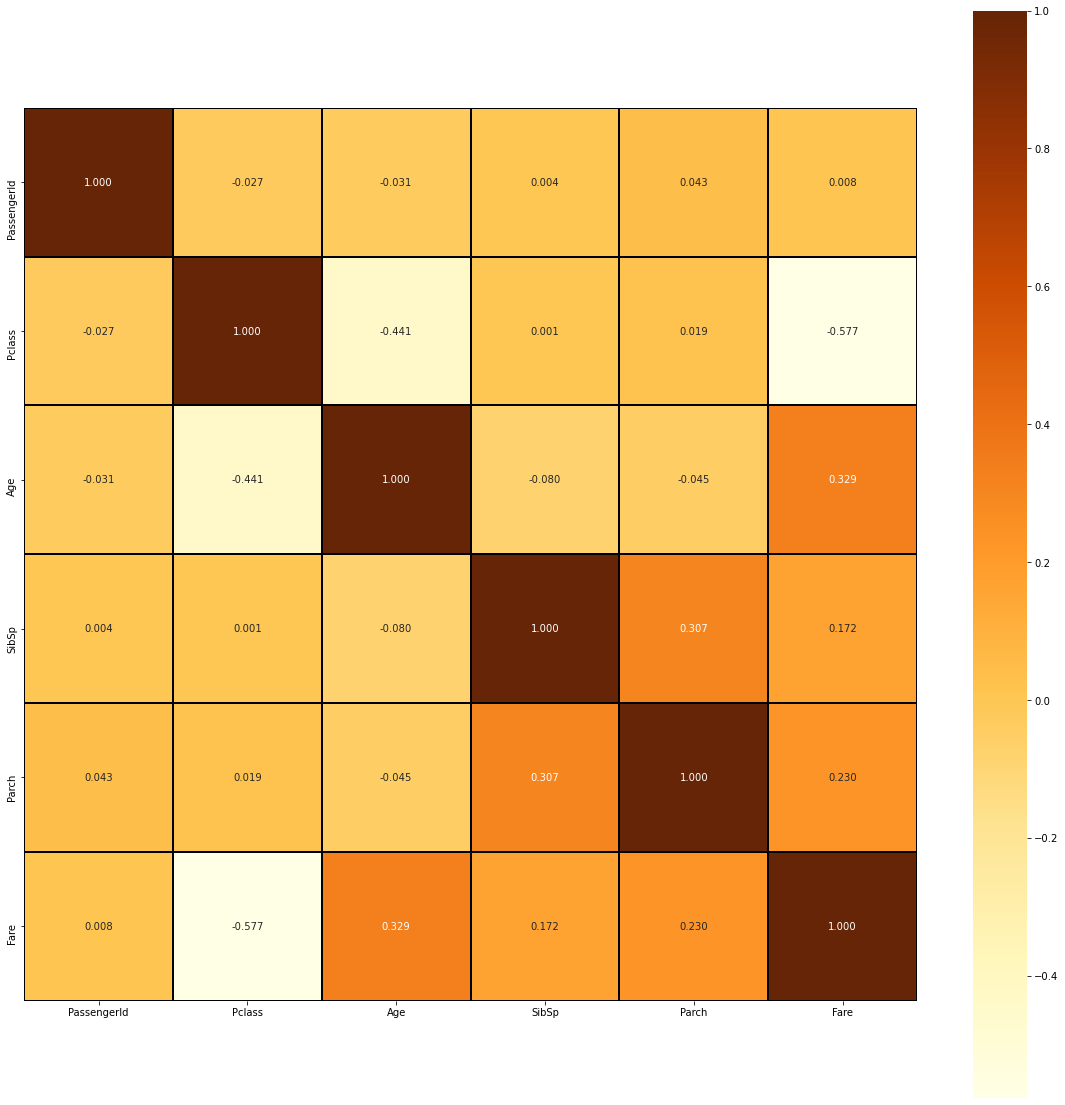

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(test.corr(),annot=True,fmt="0.3f",cmap='YlOrBr',linewidth=1.2,linecolor='black',square=True)
plt.show()

**<p style="color:purple;">Bar graphs and CountPlots :**

In [41]:
train['Survived'] = Y

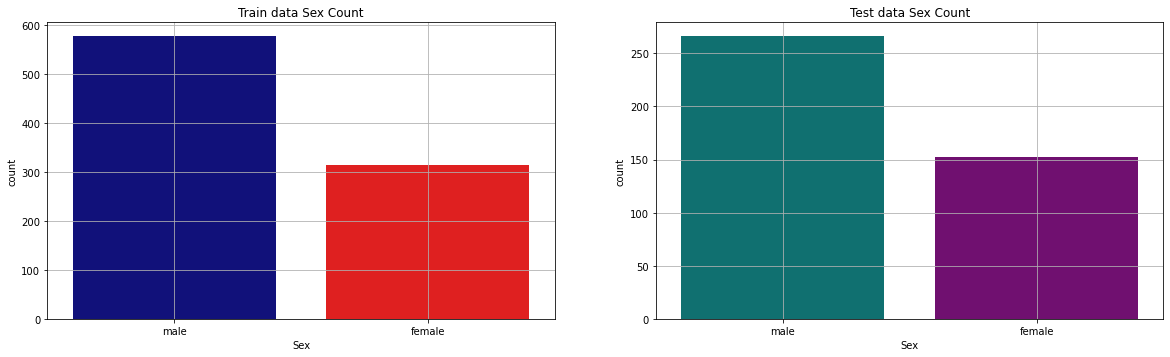

In [42]:
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
sns.countplot('Sex',data=train,palette=['darkblue','red'])
plt.title("Train data Sex Count")
plt.grid()

plt.subplot(2,2,2)
sns.countplot('Sex',data=test,palette=['teal','purple'])
plt.title("Test data Sex Count")
plt.grid()

plt.show()

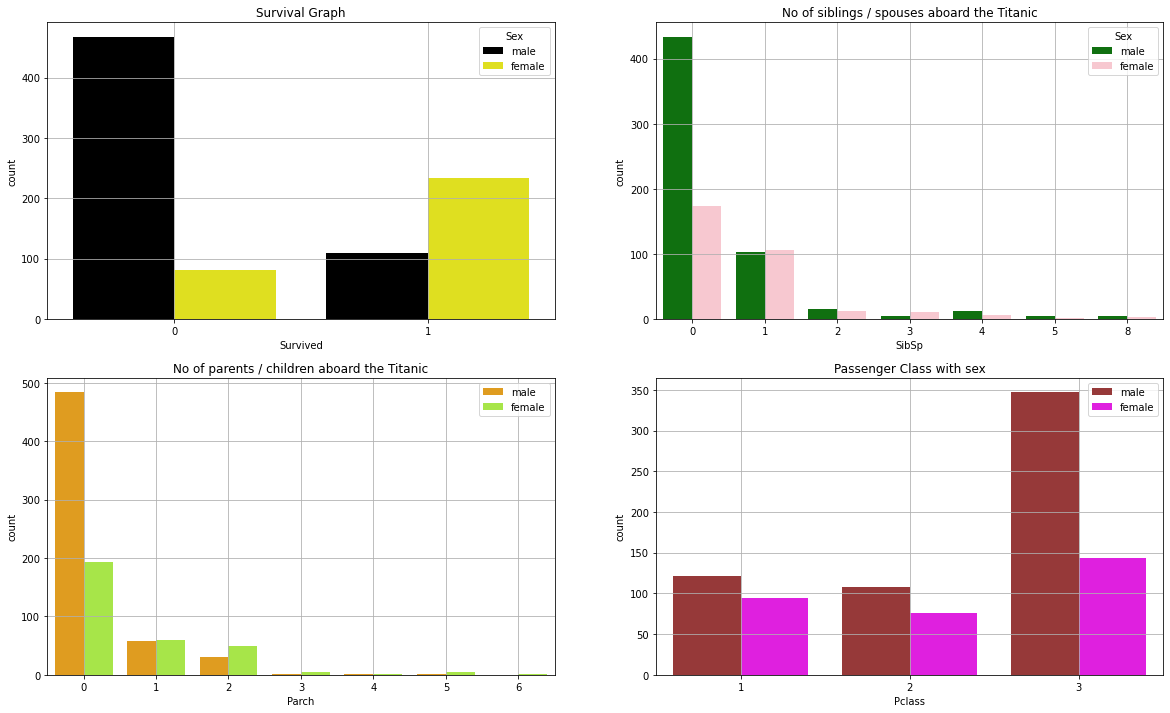

In [43]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.countplot('Survived',data=train,palette=['black','yellow'],hue='Sex')
plt.grid()
plt.title("Survival Graph")

plt.subplot(2,2,2)
sns.countplot('SibSp',data=train,palette=['green','pink'],hue='Sex')
plt.grid()
plt.title("No of siblings / spouses aboard the Titanic")

plt.subplot(2,2,3)
sns.countplot('Parch',data=train,palette=['orange','greenyellow'],hue='Sex')
plt.grid()
plt.title("No of parents / children aboard the Titanic")
plt.legend(loc='upper right')

plt.subplot(2,2,4)
sns.countplot('Pclass',data=train,palette=['brown','magenta'],hue='Sex')
plt.grid()
plt.title("Passenger Class with sex")
plt.legend(loc='upper right')

plt.show()

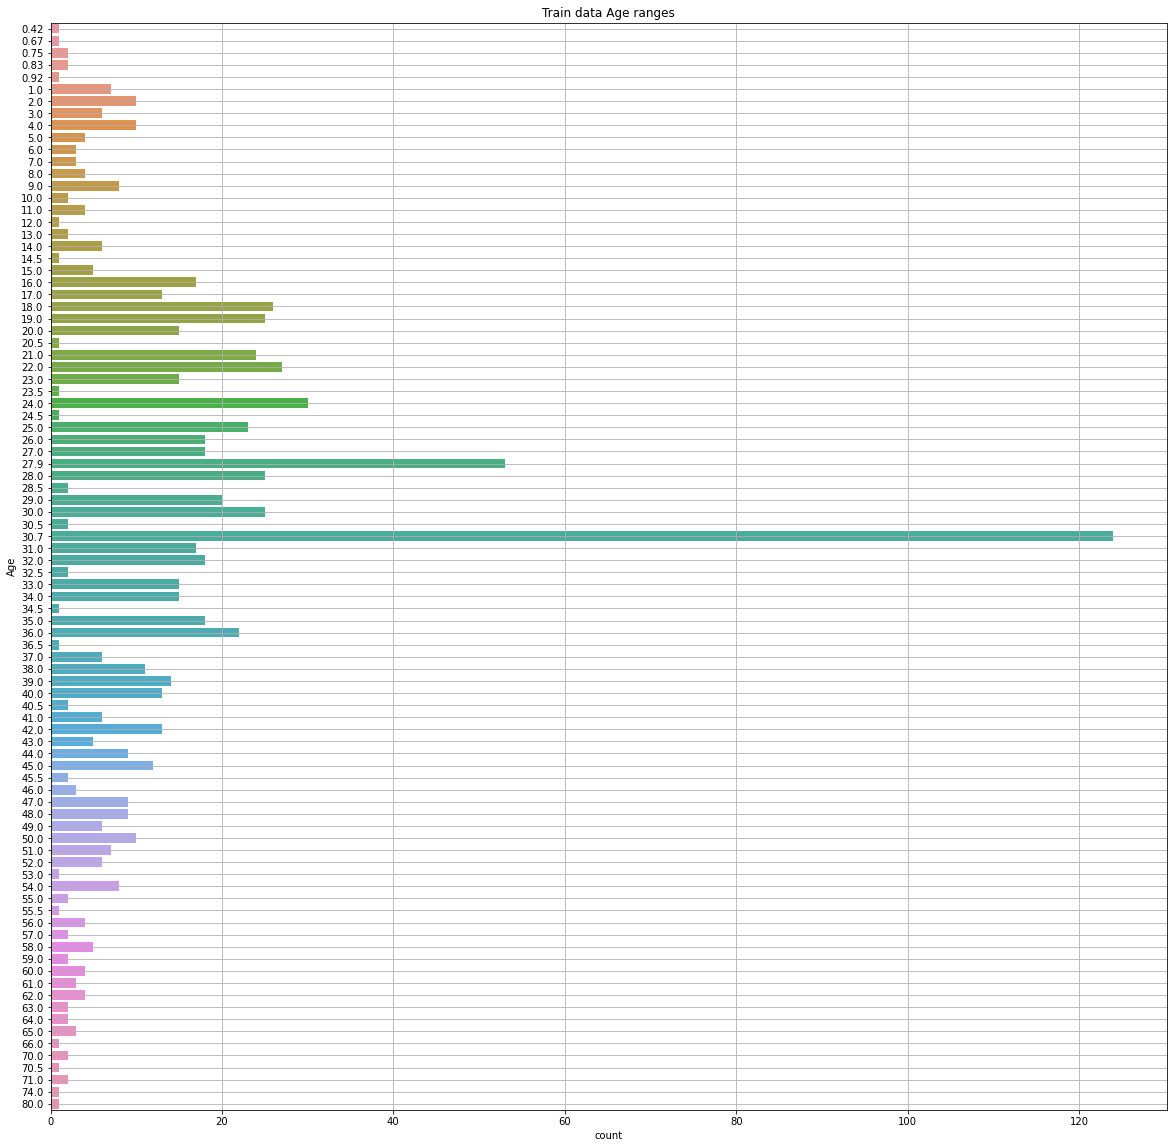

In [44]:
plt.figure(figsize=(20,20))
sns.countplot(y='Age',data=train)
plt.grid()
plt.title("Train data Age ranges")
plt.show()

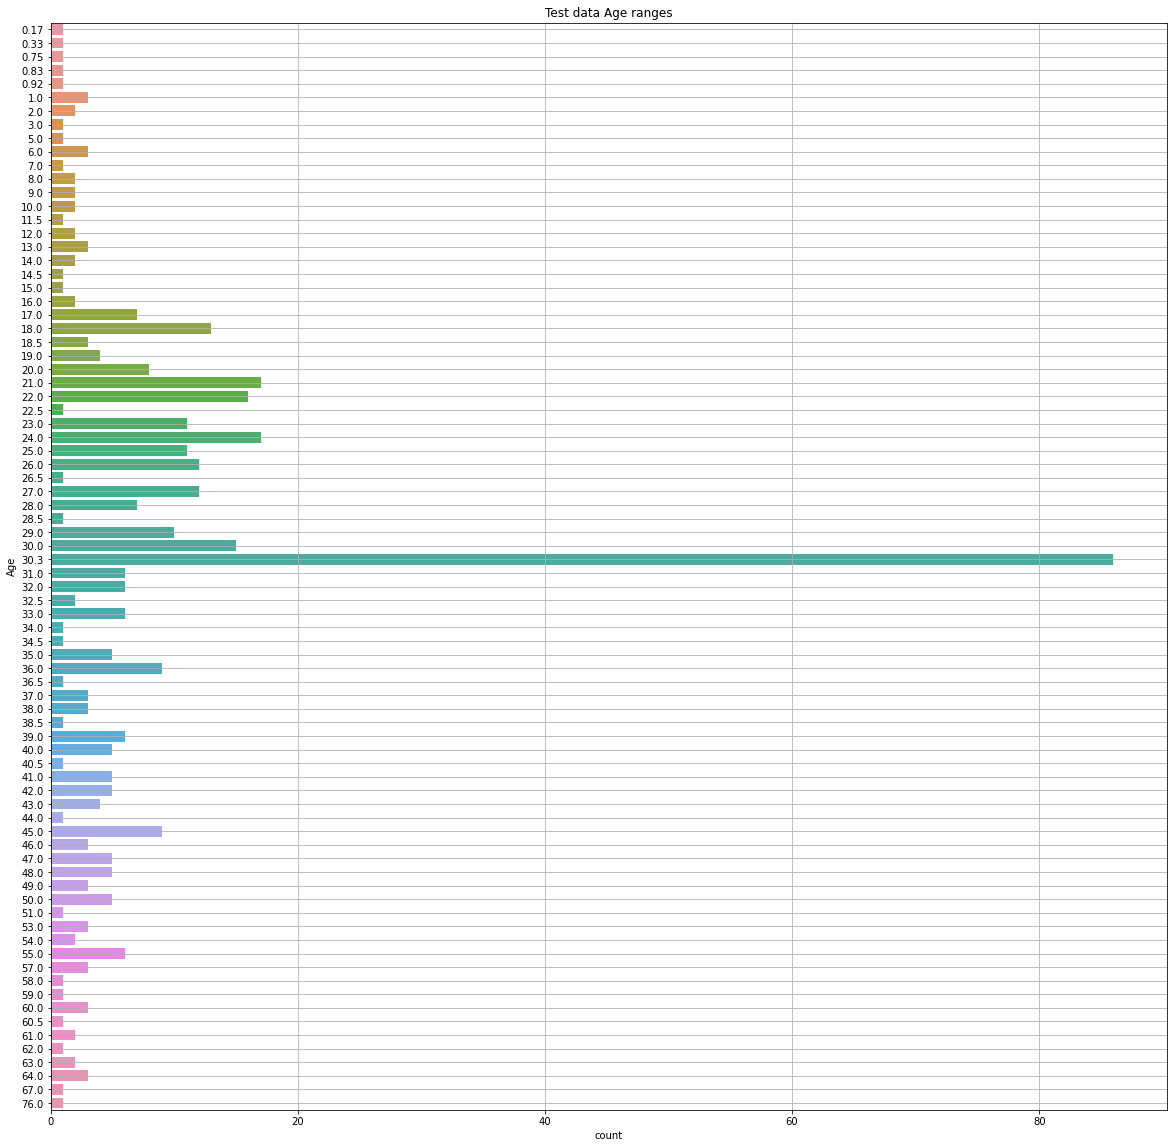

In [45]:
plt.figure(figsize=(20,20))
sns.countplot(y='Age',data=test)
plt.grid()
plt.title("Test data Age ranges")
plt.show()

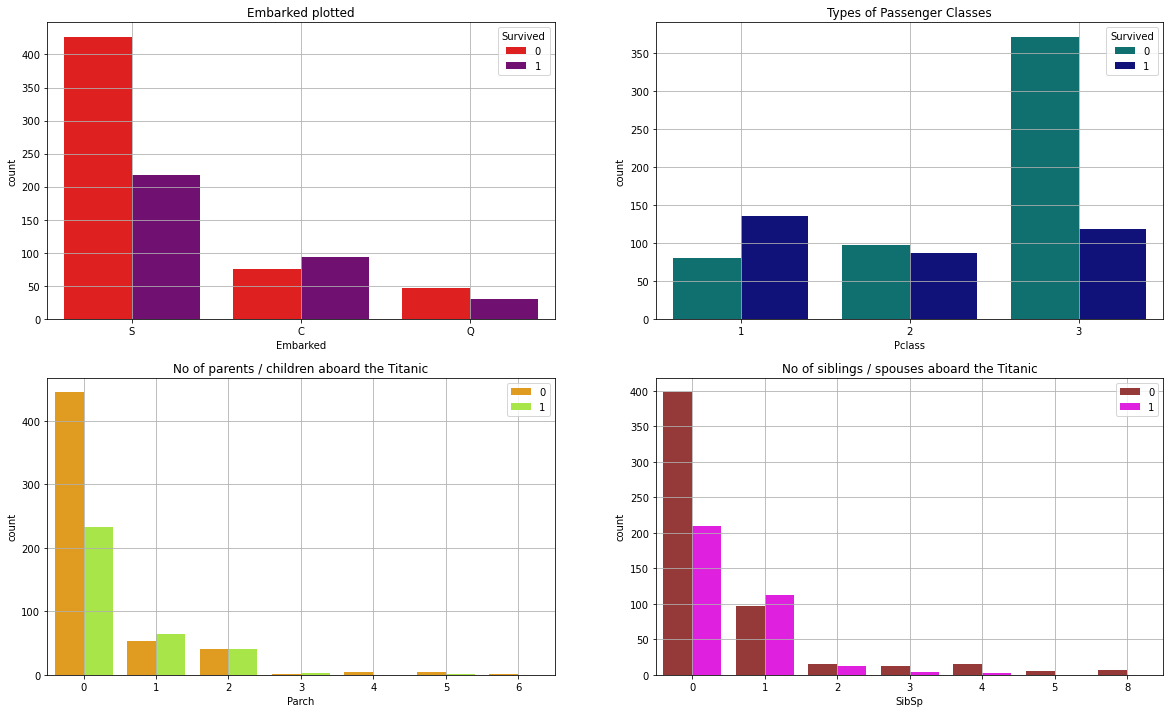

In [46]:
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
sns.countplot('Embarked',data=train,hue='Survived',palette=['red','purple'])
plt.grid()
plt.title("Embarked plotted")

plt.subplot(2,2,2)
sns.countplot('Pclass',data=train,hue='Survived',palette=['teal','darkblue'])
plt.grid()
plt.title("Types of Passenger Classes")

plt.subplot(2,2,3)
sns.countplot('Parch',data=train,palette=['orange','greenyellow'],hue='Survived')
plt.grid()
plt.title("No of parents / children aboard the Titanic")
plt.legend(loc='upper right')

plt.subplot(2,2,4)
sns.countplot('SibSp',data=train,palette=['brown','magenta'],hue='Survived')
plt.grid()
plt.title("No of siblings / spouses aboard the Titanic")
plt.legend(loc='upper right')

plt.show()

**<p style="color:green;">Pie Charts :**

In [47]:
fig = px.pie(train,names='Sex',color='Survived')
fig.update_traces(rotation=140,pull=0.01,marker=dict(line=dict(color='#000000',width=1.2)))
fig.show()

In [48]:
fig = px.pie(train,names='Embarked',color='Survived',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(rotation=140,pull=0.01,marker=dict(line=dict(color='#000000',width=1.2)))
fig.show()

In [49]:
fig = px.pie(train,names='Pclass',color='Survived',color_discrete_sequence=px.colors.sequential.GnBu)
fig.update_traces(rotation=140,pull=0.01,marker=dict(line=dict(color='#000000',width=1.2)))
fig.show()

In [50]:
fig = px.pie(train,names='SibSp',color='Survived',template='seaborn')
fig.update_traces(rotation=140,pull=0.01,marker=dict(line=dict(color='#000000',width=1.2)))
fig.show()

**<p style="color:green;">Violin Plots :**

In [51]:
fig = px.violin(train,x='Sex',y='Age',points='all',box=True,color='Survived')
fig.show()

fig = px.violin(train,x='Sex',y='Pclass',points='all',box=True,color='Survived')
fig.show()

fig = px.violin(train,x='Sex',y='SibSp',points='all',box=True)
fig.show()

In [52]:
fig = px.violin(train,x='Survived',y='Age',points='all',box=True,color='Survived')
fig.show()

fig = px.violin(train,x='Survived',y='Pclass',points='all',box=True,color='Survived')
fig.show()

fig = px.violin(train,x='Survived',y='SibSp',points='all',box=True)
fig.show()

**<p style="color:green;">Scatter Plots :**

In [53]:
fig = px.scatter(train,x='Age',y='Fare',color='Survived',size='Age')
fig.show()

fig = px.scatter(train,x='Age',y='Fare',color='Sex',size='Age')
fig.show()

In [54]:
train = train.drop('Survived',axis=1)

# **<h1 style="color:skyblue;">Data Modeling :**

In [55]:
train_ohe = data_ohe[:train.shape[0]]
test_ohe = data_ohe[train.shape[0]:]

In [56]:
len(data)

1309

# **<h1 style="color:skyblue;">Train-Test Split :**

In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(train_ohe,Y,test_size=0.2)

In [58]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(712, 37)
(179, 37)
(712,)
(179,)


# **<h1 style="color:skyblue;">ML Models :**

In [59]:
def plot_conf_matrix(Y_test,Y_pred):
    conf = confusion_matrix(Y_test,Y_pred)
    recall =(((conf.T)/(conf.sum(axis=1))).T)
    precision =(conf/conf.sum(axis=0))

    print("Confusion Matrix : ")
    class_labels = [0,1]
    plt.figure(figsize=(10,8))
    sns.heatmap(conf,annot=True,fmt=".3f",cmap="GnBu",xticklabels=class_labels,yticklabels=class_labels,linecolor='black',linewidth=1.2)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("Precision Matrix ; ")
    plt.figure(figsize=(10,8))
    sns.heatmap(precision,annot=True,fmt=".3f",cmap="YlOrBr",xticklabels=class_labels,yticklabels=class_labels,linecolor='black',linewidth=1.2)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("Recall Matrix ; ")
    plt.figure(figsize=(10,8))
    sns.heatmap(recall,annot=True,fmt=".3f",cmap="Blues",xticklabels=class_labels,yticklabels=class_labels,linecolor='black',linewidth=1.2)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

# **<h1 style="color:skyblue;">Random Forest :**

In [60]:
# params = dict(
#     n_estimators = [2,5,10,15,20,25,30,40,50,70,100,125,150,200,300,400,500,700,1000],
#     criterion = ['gini','entropy'],
#     max_depth = [2,5,10,15,20,25,30,40,50,70,100,125,150,200,300,400,500,700,1000],
#     min_samples_leaf = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
# )
# rf = RandomForestClassifier()
# clf = RandomizedSearchCV(rf,params,random_state=0,verbose=0,n_jobs=-1,n_iter=20,cv=10)
# rsc = clf.fit(X_train,Y_train)
# rsc.best_params_

81.56424581005587
Confusion Matrix : 


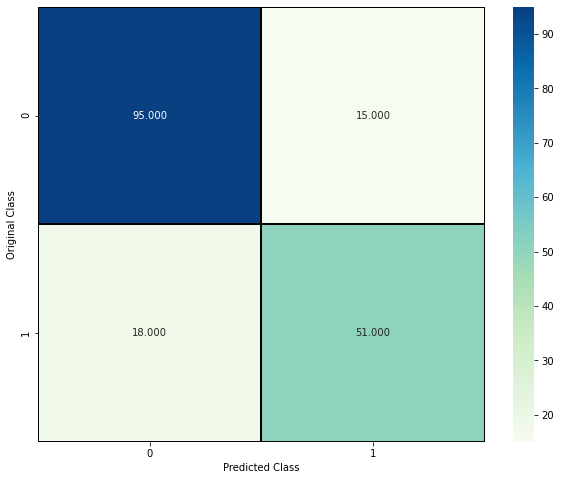

Precision Matrix ; 


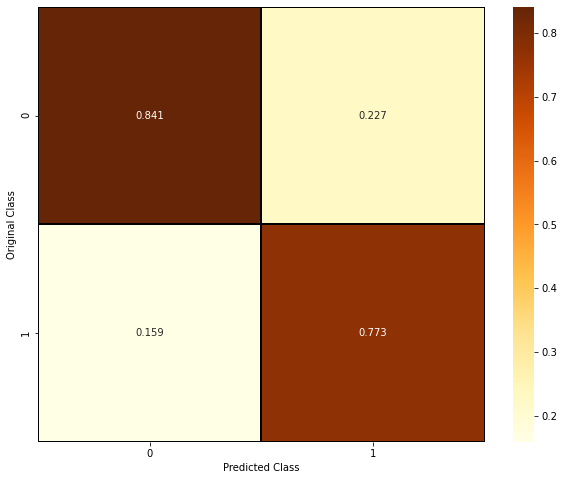

Recall Matrix ; 


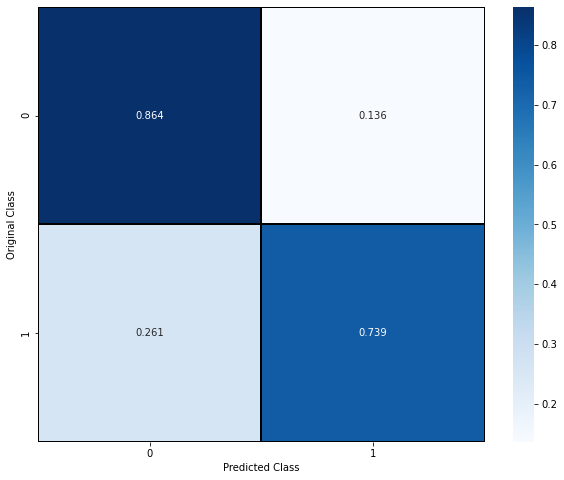

In [61]:
rf = RandomForestClassifier(n_estimators=15,min_samples_leaf=6,max_depth=400,criterion='gini')
rf.fit(X_train,Y_train)
pred = rf.predict(X_test)
acc = accuracy_score(Y_test,pred)*100
print(acc)
plot_conf_matrix(Y_test,pred)

# **<h1 style="color:skyblue;">GBDT :**

In [62]:
# params = dict(
#     learning_rate = [0.001,0.01,0.1,1,10,100,1000],
#     n_estimators = [2,5,10,15,20,25,30,40,50,70,100,125,150,200,300,400,500,700,1000],
#     criterion = ['friedman_mse','mse','mae'],
#     max_depth = [2,5,10,15,20,25,30,40,50,70,100,125,150,200,300,400,500,700,1000],
#     min_samples_leaf = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
# )
# gbdt = GradientBoostingClassifier()
# clf = RandomizedSearchCV(gbdt,params,random_state=0,verbose=0,n_jobs=-1,n_iter=20,cv=10)
# gb = clf.fit(X_train,Y_train)
# gb.best_params_

86.59217877094973
Confusion Matrix : 


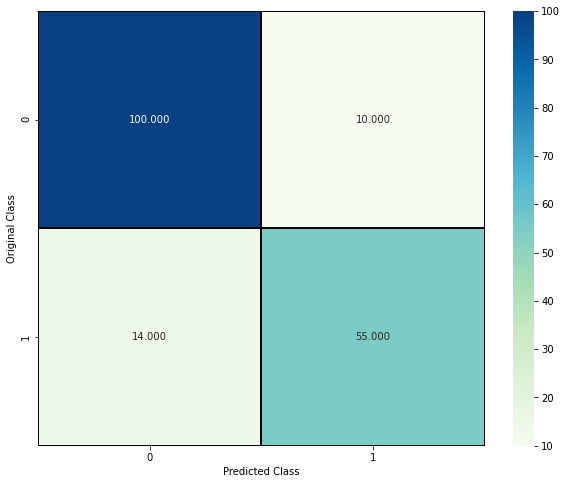

Precision Matrix ; 


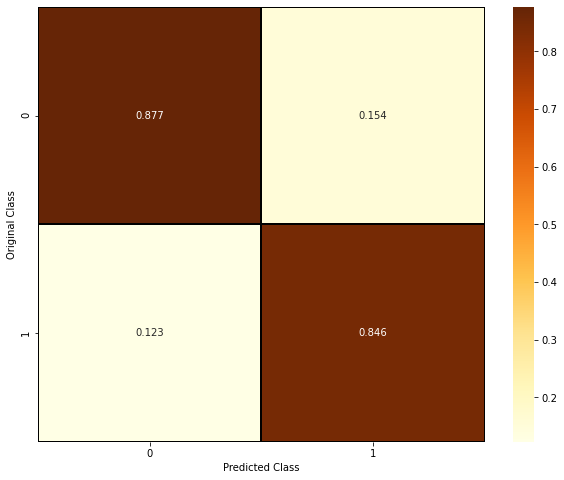

Recall Matrix ; 


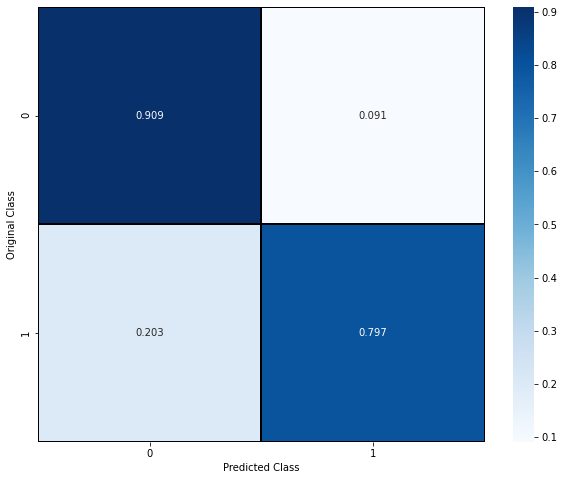

In [63]:
gbdt = GradientBoostingClassifier(n_estimators=700,min_samples_leaf=8,max_depth=1000,criterion='mse',learning_rate=0.01)
gbdt.fit(X_train,Y_train)
pred = gbdt.predict(X_test)
acc = accuracy_score(Y_test,pred)*100
print(acc)
plot_conf_matrix(Y_test,pred)

#  **<h1 style="color:skyblue;">Voting Classifier :**

87.70949720670392
Confusion Matrix : 


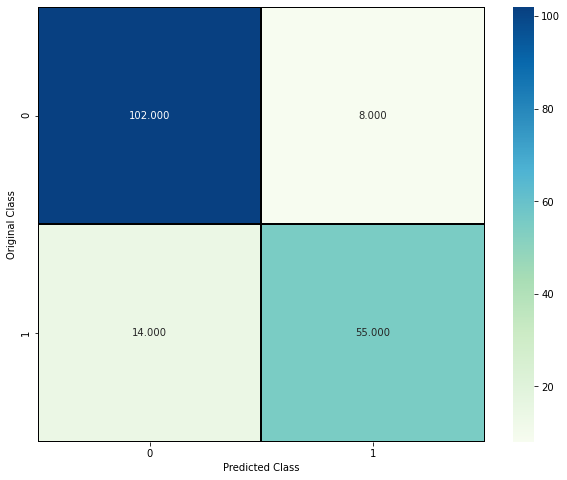

Precision Matrix ; 


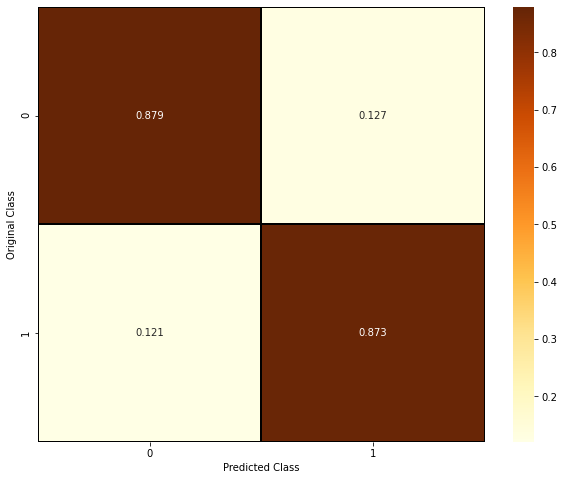

Recall Matrix ; 


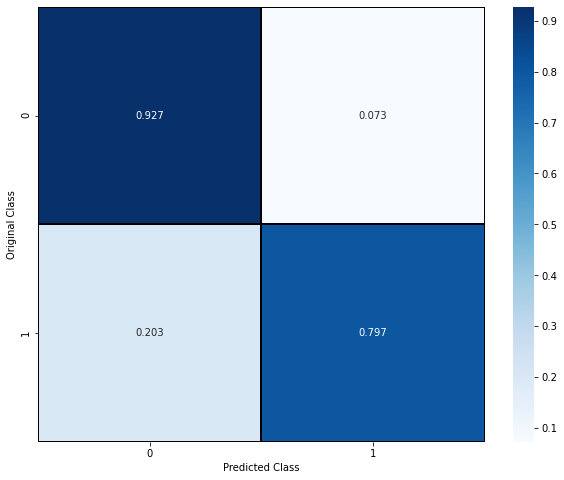

In [64]:
vc = VotingClassifier(estimators=[('rf', rf), ('gbdt', gbdt)],voting='soft')
vc = vc.fit(X_train,Y_train)

pred = vc.predict(X_test)
acc = accuracy_score(Y_test,pred)*100
print(acc)
plot_conf_matrix(Y_test,pred)

# **<h1 style="color:skyblue;">Predictions :**

In [65]:
X_train.shape

(712, 37)

In [66]:
test['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [67]:
predictions = gbdt.predict(test_ohe)
predictions.shape

(418,)

In [68]:
submit = pd.DataFrame(test['PassengerId'],columns=['PassengerId'])
submit['Survived'] = predictions
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [69]:
submit.to_csv("Submissions.csv",index=False)
print("Finished saving the file")

Finished saving the file


**<p style="color:red;">And we are done with the predictions.</p>**

**<p style="color:orange">Thanks for viewing.**